# Stock prediction with simple classifier

## Functions from the library PatternPy

In [1]:
import pandas as pd
import numpy as np


def detect_head_shoulder(df, window=3):
# Define the rolling window
    roll_window = window
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    # Create a boolean mask for Head and Shoulder pattern
    mask_head_shoulder = ((df['high_roll_max'] > df['High'].shift(1)) & (df['high_roll_max'] > df['High'].shift(-1)) & (df['High'] < df['High'].shift(1)) & (df['High'] < df['High'].shift(-1)))
    # Create a boolean mask for Inverse Head and Shoulder pattern
    mask_inv_head_shoulder = ((df['low_roll_min'] < df['Low'].shift(1)) & (df['low_roll_min'] < df['Low'].shift(-1)) & (df['Low'] > df['Low'].shift(1)) & (df['Low'] > df['Low'].shift(-1)))
    # Create a new column for Head and Shoulder and its inverse pattern and populate it using the boolean masks
    df['head_shoulder_pattern'] = np.nan
    df.loc[mask_head_shoulder, 'head_shoulder_pattern'] = 'Head and Shoulder'
    df.loc[mask_inv_head_shoulder, 'head_shoulder_pattern'] = 'Inverse Head and Shoulder'
    return df 
    # return not df['head_shoulder_pattern'].isna().any().item()

def detect_multiple_tops_bottoms(df, window=3):
# Define the rolling window
    roll_window = window
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    df['close_roll_max'] = df['Close'].rolling(window=roll_window).max()
    df['close_roll_min'] = df['Close'].rolling(window=roll_window).min()
    # Create a boolean mask for multiple top pattern
    mask_top = (df['high_roll_max'] >= df['High'].shift(1)) & (df['close_roll_max'] < df['Close'].shift(1))
    # Create a boolean mask for multiple bottom pattern
    mask_bottom = (df['low_roll_min'] <= df['Low'].shift(1)) & (df['close_roll_min'] > df['Close'].shift(1))
    # Create a new column for multiple top bottom pattern and populate it using the boolean masks
    df['multiple_top_bottom_pattern'] = np.nan
    df.loc[mask_top, 'multiple_top_bottom_pattern'] = 'Multiple Top'
    df.loc[mask_bottom, 'multiple_top_bottom_pattern'] = 'Multiple Bottom'
    return df

def calculate_support_resistance(df, window=3):
# Define the rolling window
    roll_window = window
    # Set the number of standard deviation
    std_dev = 2
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    # Calculate the mean and standard deviation for High and Low
    mean_high = df['High'].rolling(window=roll_window).mean()
    std_high = df['High'].rolling(window=roll_window).std()
    mean_low = df['Low'].rolling(window=roll_window).mean()
    std_low = df['Low'].rolling(window=roll_window).std()
    # Create a new column for support and resistance
    df['support'] = mean_low - std_dev * std_low
    df['resistance'] = mean_high + std_dev * std_high
    return df
def detect_triangle_pattern(df, window=3):
    # Define the rolling window
    roll_window = window
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    # Create a boolean mask for ascending triangle pattern
    mask_asc = (df['high_roll_max'] >= df['High'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(1)) & (df['Close'] > df['Close'].shift(1))
    # Create a boolean mask for descending triangle pattern
    mask_desc = (df['high_roll_max'] <= df['High'].shift(1)) & (df['low_roll_min'] >= df['Low'].shift(1)) & (df['Close'] < df['Close'].shift(1))
    # Create a new column for triangle pattern and populate it using the boolean masks
    df['triangle_pattern'] = np.nan
    df.loc[mask_asc, 'triangle_pattern'] = 'Ascending Triangle'
    df.loc[mask_desc, 'triangle_pattern'] = 'Descending Triangle'
    return df

def detect_wedge(df, window=3):
    # Define the rolling window
    roll_window = window
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    df['trend_high'] = df['High'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
    df['trend_low'] = df['Low'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
    # Create a boolean mask for Wedge Up pattern
    mask_wedge_up = (df['high_roll_max'] >= df['High'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(1)) & (df['trend_high'] == 1) & (df['trend_low'] == 1)
    # Create a boolean mask for Wedge Down pattern
        # Create a boolean mask for Wedge Down pattern
    mask_wedge_down = (df['high_roll_max'] <= df['High'].shift(1)) & (df['low_roll_min'] >= df['Low'].shift(1)) & (df['trend_high'] == -1) & (df['trend_low'] == -1)
    # Create a new column for Wedge Up and Wedge Down pattern and populate it using the boolean masks
    df['wedge_pattern'] = np.nan
    df.loc[mask_wedge_up, 'wedge_pattern'] = 'Wedge Up'
    df.loc[mask_wedge_down, 'wedge_pattern'] = 'Wedge Down'
    return df
def detect_channel(df, window=3):
    # Define the rolling window
    roll_window = window
    # Define a factor to check for the range of channel
    channel_range = 0.1
    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    df['trend_high'] = df['High'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
    df['trend_low'] = df['Low'].rolling(window=roll_window).apply(lambda x: 1 if (x[-1]-x[0])>0 else -1 if (x[-1]-x[0])<0 else 0)
    # Create a boolean mask for Channel Up pattern
    mask_channel_up = (df['high_roll_max'] >= df['High'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(1)) & (df['high_roll_max'] - df['low_roll_min'] <= channel_range * (df['high_roll_max'] + df['low_roll_min'])/2) & (df['trend_high'] == 1) & (df['trend_low'] == 1)
    # Create a boolean mask for Channel Down pattern
    mask_channel_down = (df['high_roll_max'] <= df['High'].shift(1)) & (df['low_roll_min'] >= df['Low'].shift(1)) & (df['high_roll_max'] - df['low_roll_min'] <= channel_range * (df['high_roll_max'] + df['low_roll_min'])/2) & (df['trend_high'] == -1) & (df['trend_low'] == -1)
    # Create a new column for Channel Up and Channel Down pattern and populate it using the boolean masks
    df['channel_pattern'] = np.nan
    df.loc[mask_channel_up, 'channel_pattern'] = 'Channel Up'
    df.loc[mask_channel_down, 'channel_pattern'] = 'Channel Down'
    return df

def detect_double_top_bottom(df, window=3, threshold=0.05):
    # Define the rolling window
    roll_window = window
    # Define a threshold to check for the range of pattern
    range_threshold = threshold

    # Create a rolling window for High and Low
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()

    # Create a boolean mask for Double Top pattern
    mask_double_top = (df['high_roll_max'] >= df['High'].shift(1)) & (df['high_roll_max'] >= df['High'].shift(-1)) & (df['High'] < df['High'].shift(1)) & (df['High'] < df['High'].shift(-1)) & ((df['High'].shift(1) - df['Low'].shift(1)) <= range_threshold * (df['High'].shift(1) + df['Low'].shift(1))/2) & ((df['High'].shift(-1) - df['Low'].shift(-1)) <= range_threshold * (df['High'].shift(-1) + df['Low'].shift(-1))/2)
    # Create a boolean mask for Double Bottom pattern
    mask_double_bottom = (df['low_roll_min'] <= df['Low'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(-1)) & (df['Low'] > df['Low'].shift(1)) & (df['Low'] > df['Low'].shift(-1)) & ((df['High'].shift(1) - df['Low'].shift(1)) <= range_threshold * (df['High'].shift(1) + df['Low'].shift(1))/2) & ((df['High'].shift(-1) - df['Low'].shift(-1)) <= range_threshold * (df['High'].shift(-1) + df['Low'].shift(-1))/2)

    # Create a new column for Double Top and Double Bottom pattern and populate it using the boolean masks
    df['double_pattern'] = np.nan
    df.loc[mask_double_top, 'double_pattern'] = 'Double Top'
    df.loc[mask_double_bottom, 'double_pattern'] = 'Double Bottom'

    return df

def detect_trendline(df, window=2):
    # Define the rolling window
    roll_window = window
    # Create new columns for the linear regression slope and y-intercept
    df['slope'] = np.nan
    df['intercept'] = np.nan

    for i in range(window, len(df)):
        x = np.array(range(i-window, i))
        y = df['Close'][i-window:i]
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        df.at[df.index[i], 'slope'] = m
        df.at[df.index[i], 'intercept'] = c

    # Create a boolean mask for trendline support
    mask_support = df['slope'] > 0

    # Create a boolean mask for trendline resistance
    mask_resistance = df['slope'] < 0

    # Create new columns for trendline support and resistance
    df['support'] = np.nan
    df['resistance'] = np.nan

    # Populate the new columns using the boolean masks
    df.loc[mask_support, 'support'] = df['Close'] * df['slope'] + df['intercept']
    df.loc[mask_resistance, 'resistance'] = df['Close'] * df['slope'] + df['intercept']

    return df

def find_pivots(df):
    # Calculate differences between consecutive highs and lows
    high_diffs = df['high'].diff()
    low_diffs = df['low'].diff()

    # Find higher high
    higher_high_mask = (high_diffs > 0) & (high_diffs.shift(-1) < 0)
    
    # Find lower low
    lower_low_mask = (low_diffs < 0) & (low_diffs.shift(-1) > 0)

    # Find lower high
    lower_high_mask = (high_diffs < 0) & (high_diffs.shift(-1) > 0)

    # Find higher low
    higher_low_mask = (low_diffs > 0) & (low_diffs.shift(-1) < 0)

    # Create signals column
    df['signal'] = ''
    df.loc[higher_high_mask, 'signal'] = 'HH'
    df.loc[lower_low_mask, 'signal'] = 'LL'
    df.loc[lower_high_mask, 'signal'] = 'LH'
    df.loc[higher_low_mask, 'signal'] = 'HL'

    return df


## Reading data from Yahoo Finance for Coca Cola and S&P 500

In [2]:
import yfinance as yf

ticker = 'KO'

df = yf.download(ticker)

SP500_ticker = '^GSPC'

df_500 = yf.download(SP500_ticker)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Cleaning data, feature engineering

In [3]:
df_500 = df_500['Close'].to_frame()
df_500.rename(columns = {'Close': 'Close500'}, inplace = True)
df_500['Tomorrow500'] = df_500['Close500'].shift(-1).copy()
df_500['Change500'] = df_500['Tomorrow500'].div(df_500['Close500'])
df_500['Target500'] = ((df_500['Tomorrow500'] > df_500['Close500'])).astype(int)

In [4]:
df = df.merge(df_500, how = 'left', left_index = True , right_index = True)

In [5]:
df['Tomorrow'] = df['Close'].shift(-1).copy()
df['Change'] = df['Tomorrow'].div(df['Close'])
df['Target'] = ((df['Tomorrow'] > df['Close'])).astype(int)

In [6]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [7]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio500_{horizon}"
    df[ratio_column] = df["Close500"] / rolling_averages["Close500"]
    
    trend_column = f"Trend500_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target500"]
    
    new_predictors+= [ratio_column, trend_column]

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume,Close500,Tomorrow500,Change500,Target500,...,Close_Ratio500_2,Trend500_2,Close_Ratio500_5,Trend500_5,Close_Ratio500_60,Trend500_60,Close_Ratio500_250,Trend500_250,Close_Ratio500_1000,Trend500_1000
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.048145,806400,70.959999,71.129997,1.002396,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.047072,1574400,71.129997,70.639999,0.993111,0,...,1.001196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.047430,844800,70.639999,69.660004,0.986127,0,...,0.996544,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.046357,1420800,69.660004,69.120003,0.992248,0,...,0.993015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.045880,2035200,69.120003,69.150002,1.000434,1,...,0.996109,0.0,0.983187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-19,59.000000,59.200001,58.639999,58.830002,58.830002,14612200,4768.370117,4698.350098,0.985316,0,...,1.002925,2.0,1.007909,4.0,1.079160,37.0,1.119893,135.0,1.203954,529.0
2023-12-20,58.500000,58.669998,57.570000,57.610001,57.610001,17701000,4698.350098,4746.750000,1.010301,1,...,0.992604,1.0,0.993476,3.0,1.061612,37.0,1.102599,134.0,1.185835,528.0
2023-12-21,57.849998,58.070000,57.470001,57.990002,57.990002,11725100,4746.750000,4754.629883,1.001660,1,...,1.005124,1.0,1.002557,3.0,1.070644,37.0,1.112992,135.0,1.197601,528.0


In [10]:
df = detect_head_shoulder(df)
df = detect_multiple_tops_bottoms(df)
df = calculate_support_resistance(df)
df = detect_triangle_pattern(df)
df = detect_double_top_bottom(df)
df = detect_trendline(df)

In [11]:
df.drop(df.loc[df.high_roll_max.isna()].index, inplace = True)
df.head_shoulder_pattern.fillna('neither', inplace = True)
df.drop('multiple_top_bottom_pattern', axis = 1, inplace = True)
df.drop(['resistance', 'support'], axis = 1, inplace = True)
df.triangle_pattern.fillna('neither', inplace = True)
df.double_pattern.fillna('neither', inplace = True)

## Only data from 2010-01-01 in model

In [18]:
df = df.loc[df.index >= '2010-01-01'].copy()

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Close500,Tomorrow500,Change500,Target500,...,Trend500_1000,high_roll_max,low_roll_min,head_shoulder_pattern,close_roll_max,close_roll_min,triangle_pattern,double_pattern,slope,intercept
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,28.580000,28.610001,28.450001,28.520000,18.498016,13870400,1132.989990,1136.520020,1.003116,1,...,539.0,28.950001,28.450001,neither,28.840000,28.500000,Ascending Triangle,neither,-0.340000,4136.721844
2010-01-05,28.424999,28.495001,28.070000,28.174999,18.274248,23172400,1136.520020,1137.140015,1.000546,1,...,539.0,28.875000,28.070000,neither,28.520000,28.174999,neither,neither,0.020000,-213.165531
2010-01-06,28.174999,28.219999,27.990000,28.165001,18.267765,19264600,1137.140015,1141.689941,1.004001,1,...,540.0,28.610001,27.990000,neither,28.520000,28.165001,neither,neither,-0.345001,4197.514751
2010-01-07,28.165001,28.184999,27.875000,28.094999,18.222368,13234600,1141.689941,1144.979980,1.002882,1,...,541.0,28.495001,27.875000,neither,28.174999,28.094999,neither,neither,-0.009998,149.004715
2010-01-08,27.730000,27.820000,27.375000,27.575001,17.885092,28712400,1144.979980,1146.979980,1.001747,1,...,541.0,28.219999,27.375000,neither,28.165001,27.575001,neither,neither,-0.070002,874.204365


In [20]:
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3518 entries, 2010-01-04 to 2023-12-22
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   3518 non-null   float64
 1   High                   3518 non-null   float64
 2   Low                    3518 non-null   float64
 3   Close                  3518 non-null   float64
 4   Adj Close              3518 non-null   float64
 5   Volume                 3518 non-null   int64  
 6   Close500               3518 non-null   float64
 7   Tomorrow500            3518 non-null   float64
 8   Change500              3518 non-null   float64
 9   Target500              3518 non-null   int64  
 10  Tomorrow               3518 non-null   float64
 11  Change                 3518 non-null   float64
 12  Target                 3518 non-null   int64  
 13  Close_Ratio_2          3518 non-null   float64
 14  Trend_2                3518 non-null  

In [22]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Close500',
       'Tomorrow500', 'Change500', 'Target500', 'Tomorrow', 'Change', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'Close_Ratio500_2', 'Trend500_2',
       'Close_Ratio500_5', 'Trend500_5', 'Close_Ratio500_60', 'Trend500_60',
       'Close_Ratio500_250', 'Trend500_250', 'Close_Ratio500_1000',
       'Trend500_1000', 'high_roll_max', 'low_roll_min',
       'head_shoulder_pattern', 'close_roll_max', 'close_roll_min',
       'triangle_pattern', 'double_pattern', 'slope', 'intercept'],
      dtype='object')

## X and y

In [23]:
X = df.drop(['Open', 'Close', 'Adj Close', 'Change',
       'Tomorrow', 'Target', 'Tomorrow500', 'Change500', 'Target500', 'Close500'], axis = 1)
y = df['Target']

## Train test split custom

In [25]:
def train_test_split_time_series(X, y, test_size):
    '''
    Splits time series data into train and test by test_size
    
    Input params
    X: Feature data
    y: Target data
    test_size: Float between 0 and 1
    
    Returns: X_train, X_test, y_train, y_test
    '''
    date = X.iloc[len(X)-int(len(X)*test_size)].name       
    X_train = X.loc[X.index < date]
    X_test = X.loc[X.index >= date]
    y_train = y[:len(X_train)]
    y_test = y[len(X_train):]
    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = train_test_split_time_series(X, y, 0.2)

## Calculate a baseline

If the model would predict that every day of the test data would be a 1 (increasing the next day) the model would be correct 54 % of the time. This is what we want the model to beat. This score represents the precision.

In [29]:
baseline = y_test.value_counts(normalize = True).loc[1]

In [30]:
baseline

0.5391180654338549

## Custom cross validation for time series data

In [39]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import precision_score, make_scorer

def grid_search_time_series_simple(model, X, y, cv, output = True):
    '''
    Function that cross validates the data and returns the precision score for the current model
    
    Input params
    model: ML model to be used in the gridsearch
    X: Feature data for the model
    y: Target data for the model
    cv: Int for number of splits
    output = True: Boolean for showing the output or not
    
    Returns: model name and precision score in a list
    '''
    precision_scores = []
    predictions = []
    
    tscv = TimeSeriesSplit(n_splits=cv)
    for train_index, test_index in tscv.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        precision_scores.append(precision_score(y_test_cv, y_pred, zero_division = 0))
    if output == True:
        print(model[1], sum(precision_scores) / len(precision_scores))
    return [model[1], sum(precision_scores) / len(precision_scores)]

## Function to use another threshold than 0.5 for predictions

In [38]:
def predict_threshold(model, X, t):
    '''
    Function that changes the threshold of predictions and returns the new predictions
    
    Input params
    model: Trained ML model
    X: Feature data to predict on
    t: Threshold between 0 and 1
    
    Returns y_pred (1 or 0)
    '''
    y_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_proba > t).astype(int)
    return y_pred

## Importing models for cross validation

In [188]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier

models = [RandomForestClassifier(),
          KNeighborsClassifier(),
          SVC(),
          LogisticRegression(max_iter = 1000)]

num_features = X.select_dtypes('number').columns
cat_features = X.select_dtypes(object).columns

scaler = StandardScaler()

encoder = OneHotEncoder(handle_unknown = 'error', drop = 'if_binary')

num_trans = scaler
cat_trans = encoder

preprocessor = make_column_transformer((num_trans, num_features), (cat_trans, cat_features))

for model in models:
    pipe = make_pipeline(preprocessor, model)
    grid_search_time_series_simple(pipe, X_train, y_train, 5)


RandomForestClassifier() 0.5757278268899755
KNeighborsClassifier() 0.5394020066053458
SVC() 0.5491251968577913
LogisticRegression(max_iter=1000) 0.5642611933555016


## Custom hyperparameter tuning LogReg

In [189]:
models = []
for c in [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5, 7, 10]:
    models.append(LogisticRegression(C = c, max_iter = 1000))

    
results = []    
for model in models:
    pipe = make_pipeline(preprocessor, model)
    results.append(grid_search_time_series_simple(pipe, X_train, y_train, 5, False))
best_score_logreg = 0
best_model_logreg = ''
for row in results:
    if row[1] > best_score_logreg:
        best_score_logreg = row[1]
        best_model_logreg = row[0]
print(f'best model: {best_model_logreg}, precision score: {best_score_logreg}')

best model: LogisticRegression(C=0.01, max_iter=1000), precision score: 0.5776970689354728


## Custom hyperparameter tuning Random Forest

In [190]:
models = []
for n in [100, 200, 300]:
    for min_samples_leaf in [1, 2, 4]:
        for min_samples_split in [2, 5, 10]:
            for max_depth in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]:
                models.append(RandomForestClassifier(n_jobs = -1, n_estimators = n, min_samples_leaf = min_samples_leaf,
                                                     min_samples_split = min_samples_split, max_depth = max_depth))
results = []  
for model in models:
    pipe = make_pipeline(preprocessor, model)
    results.append(grid_search_time_series_simple(pipe, X_train, y_train, 5, False))
best_score_rf = 0
best_model_rf = ''
for row in results:
    if row[1] > best_score_rf:
        best_score_rf = row[1]
        best_model_rf = row[0]
print(f'best model: {best_model_rf}, precision score: {best_score_rf}')

best model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, n_jobs=-1), precision score: 0.6141361311963581


## Custom hyperparameter tuning KNN

In [31]:
models = []
for n_neighbors in range(1, 30):
    models.append(KNeighborsClassifier(n_neighbors = n_neighbors))
    
results = []  
for model in models:
    pipe = make_pipeline(preprocessor, model)
    results.append(grid_search_time_series_simple(pipe, X_train, y_train, 5, False))
best_score_knn = 0
best_model_knn = ''
for row in results:
    if row[1] > best_score_knn:
        best_score_knn = row[1]
        best_model_knn = row[0]
print(f'best model: {best_model_knn}, precision score: {best_score_knn}')


best model: KNeighborsClassifier(n_neighbors=7), precision score: 0.5458275007280775


## Custom hyperparameter tuning SVC

In [ ]:
models = []
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for gamma in [1, 0.1, 0.01, 0.001, 0.0001]:
        for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
            models.append(SVC(C = c, gamma = gamma, kernel = kernel))
    
results = []  
for model in models:
    pipe = make_pipeline(preprocessor, model)
    results.append(grid_search_time_series_simple(pipe, X_train, y_train, 5, False))
best_score_svc = 0
best_model_svc = ''
for row in results:
    if row[1] > best_score_svc:
        best_score_svc = row[1]
        best_model_svc = row[0]
print(f'best model: {best_model_svc}, precision score: {best_score_svc}')


## LogReg Model evaluation training data

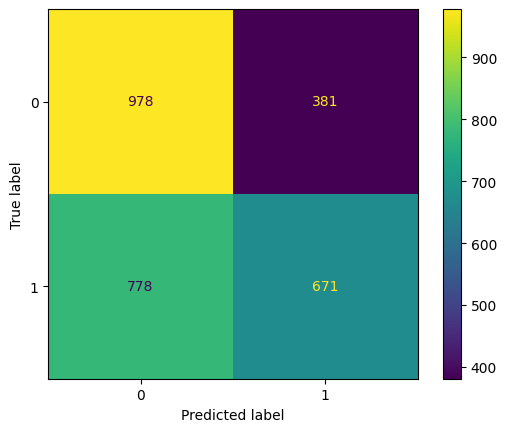

Precision: 0.6378326996197718


In [65]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

pipe_logreg = make_pipeline(preprocessor, best_model_logreg)
pipe_logreg.fit(X_train, y_train)

y_pred = predict_threshold(pipe_logreg, X_train, 0.55)

cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_logreg.classes_) 
disp.plot( values_format='d')
plt.show()

precision = precision_score(y_train, y_pred)
print(f'Precision: {precision}')

## Random Forest model evaluation training data

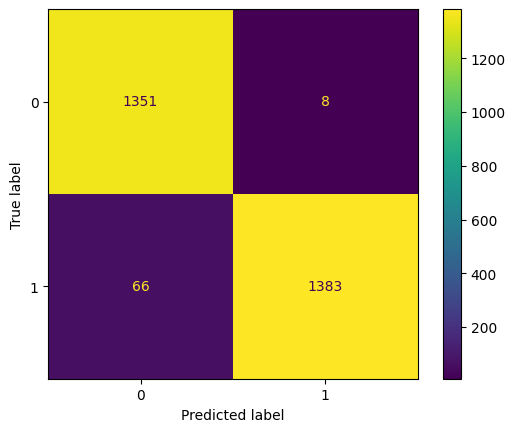

Precision: 0.9942487419122933


In [158]:
pipe_rf = make_pipeline(preprocessor, best_model_rf)
pipe_rf.fit(X_train, y_train)

y_pred = predict_threshold(pipe_rf, X_train, 0.55)

cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_rf.classes_) 
disp.plot( values_format='d')
plt.show()

precision = precision_score(y_train, y_pred)
print(f'Precision: {precision}')

## KNN model evaluation training data

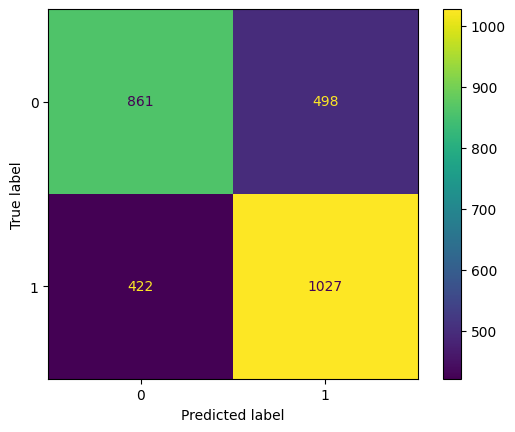

Precision: 0.6734426229508197


In [73]:
pipe_knn = make_pipeline(preprocessor, best_model_knn)
pipe_knn.fit(X_train, y_train)

y_pred = predict_threshold(pipe_knn, X_train, 0.55)

cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_knn.classes_) 
disp.plot( values_format='d')
plt.show()

precision = precision_score(y_train, y_pred)
print(f'Precision: {precision}')

## SVC model evaluation training data

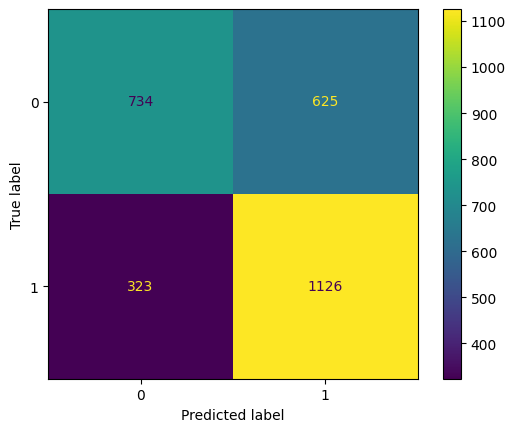

0.6430611079383209


In [59]:
pipe_svc = make_pipeline(preprocessor, best_model_svc)
pipe_svc.fit(X_train, y_train)

y_pred = pipe_svc.predict(X_train)

ConfusionMatrixDisplay.from_estimator(pipe_svc, X_train, y_train)
plt.show()

print(precision_score(y_train, y_pred))

## LogReg Model evaluation test data

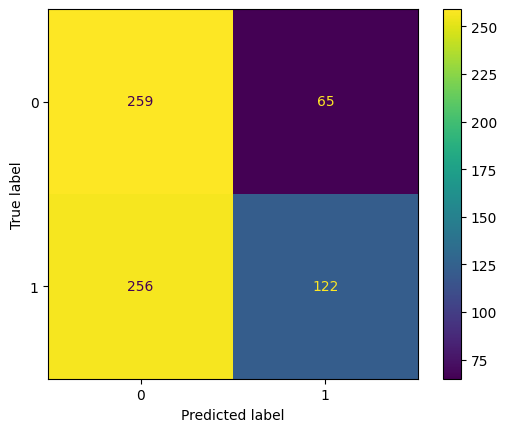

Precision: 0.6524064171122995


In [77]:
y_pred = predict_threshold(pipe_logreg, X_test, 0.55)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_logreg.classes_) 
disp.plot( values_format='d')
plt.show()

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

## Random Forest model evaluation test data

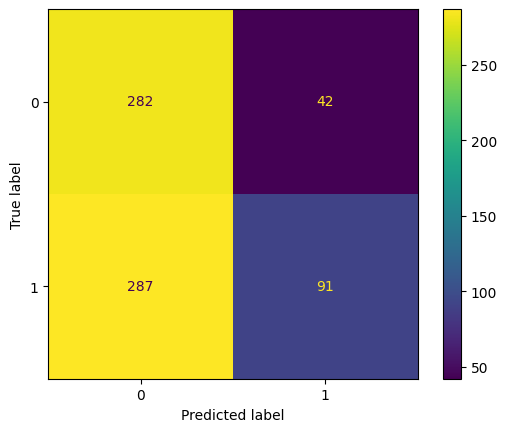

Precision: 0.6842105263157895


In [160]:
y_pred = predict_threshold(pipe_rf, X_test, 0.55)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_rf.classes_) 
disp.plot( values_format='d')
plt.savefig('randomforest.png', dpi=600, transparent=False, bbox_inches='tight', 
            format='png')
plt.show()

precision = precision_score(y_test, y_pred)

print(f'Precision: {precision}')


## KNN model evaluation test data

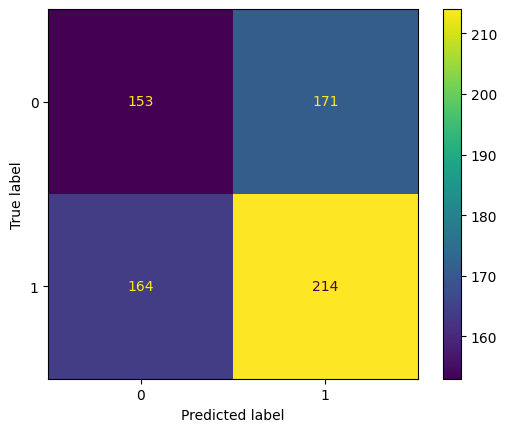

Precision: 0.5558441558441558


In [84]:
y_pred = predict_threshold(pipe_knn, X_test, 0.55)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe_knn.classes_) 
disp.plot( values_format='d')
plt.show()

precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

## SVC model evaluation test datam

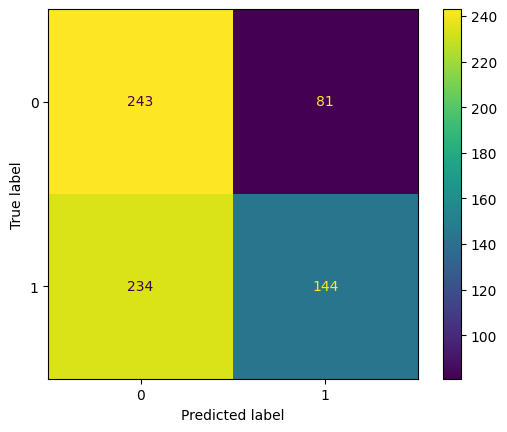

0.64


In [85]:
y_pred = pipe_svc.predict(X_test)

ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test)
plt.show()

print(precision_score(y_test, y_pred))

## Train Random Forest on both train and test data

In [153]:
pipe_final = make_pipeline(preprocessor, best_model_rf)
pipe_final.fit(X, y)

from joblib import dump

dump(pipe_final, 'stock_prediction_train_test.joblib')

['stock_prediction_train_test.joblib']